<a href="https://colab.research.google.com/github/Odigie43/horse-jumping-detection/blob/master/hotel_resservation_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing all the libraries for the work and seaborn is for plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rc("font", size =14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)


In [ ]:
# from the above command, we succeeded in dowloading the
# next is to upload the dataset from kaggle alread stored in my google drive
Emma=pd.read_csv('/content/drive/MyDrive/Hotel Reservations.csv')

In [ ]:
# to visualized the dataset is the next one
Emma.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# to get the last data in the table
Emma.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
# to get the dimension of the hotel reservation cancellation
# which shows we have 36,275 rows and 19 columns
Emma.shape

(36275, 19)

In [ ]:
# to get more information about dataset, use the command below
Emma.info

<bound method DataFrame.info of       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2     

In [ ]:
# to know the numbers of rooms booked, so tha analysis can be performed later on it
print(Emma. room_type_reserved.head())


0    Room_Type 1
1    Room_Type 1
2    Room_Type 1
3    Room_Type 1
4    Room_Type 1
Name: room_type_reserved, dtype: object


In [ ]:
##### Print the number of records of this dataset #####
print('The number of records of this dataset is {}'.format(Emma.shape[0]),'\n')
print('The number of columns of this dataset is {}'.format(Emma.shape[1]))

The number of records of this dataset is 36275 

The number of columns of this dataset is 19


In [ ]:
# To know the type of datasets types
Emma.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
# to know how many  numbers of customers depositors are there in the data
#total numbers of customers that canceled and those that do not canceled their bookings
Emma['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

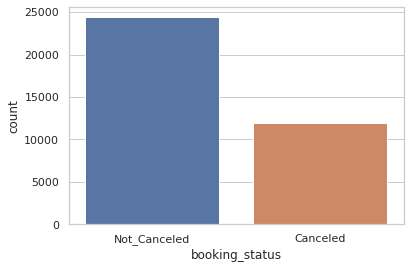

In [ ]:
sns.countplot(x='booking_status',data=Emma)
plt.show()

In [ ]:
Emma['Booking_ID'].value_counts

<bound method IndexOpsMixin.value_counts of 0        INN00001
1        INN00002
2        INN00003
3        INN00004
4        INN00005
           ...   
36270    INN36271
36271    INN36272
36272    INN36273
36273    INN36274
36274    INN36275
Name: Booking_ID, Length: 36275, dtype: object>

In [ ]:
# to find missing values
Emma.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
Emma.groupby('no_of_children').mean()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_children,,,,,,,,,,,,,
0,1.844298,0.802543,2.194538,0.029395,86.354796,2017.813950,7.425261,15.523424,0.027310,0.025196,0.164488,100.399182,0.586473
1,1.958591,0.920272,2.304079,0.042645,73.998764,2017.922126,7.433869,16.569839,0.007417,0.000618,0.025340,122.325748,1.120519
2,1.699433,0.908318,2.361059,0.064272,67.430057,2017.874291,7.344991,16.486767,0.000945,0.000000,0.000945,169.630652,0.896975
3,1.473684,0.421053,2.157895,0.000000,60.473684,2017.684211,8.263158,13.789474,0.000000,0.000000,0.000000,154.594737,1.157895
9,1.500000,2.000000,3.000000,0.000000,9.500000,2017.000000,9.000000,12.000000,0.000000,0.000000,0.000000,85.750000,0.500000
10,2.000000,0.000000,2.000000,0.000000,37.000000,2018.000000,1.000000,12.000000,0.000000,0.000000,0.000000,84.450000,1.000000


<Axes: xlabel='no_of_adults', ylabel='no_of_adults'>

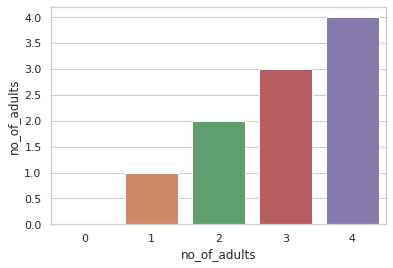

In [ ]:
sns.barplot(data=Emma, x="no_of_adults", y="no_of_adults", errorbar="sd")

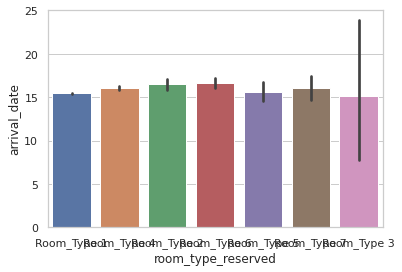

In [ ]:
# to know the room popular booked, from the diagram below,room_type 3 has the lowest booked while the first has the highest
#followed by the second one, fourth one and the fifth one.
from numpy import mean
ax =sns.barplot(x='room_type_reserved', y='arrival_date',data=Emma, estimator=mean)

In [ ]:
# from the table below, it shows that room_type1 is the most booked both day and night,followed by room_type 4,room type 6 and
# room_type 6, while room_type 3 has the lowest and room_type 7.
Emma.groupby('room_type_reserved').count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
room_type_reserved,,,,,,,,,,,,,,,,,,
Room_Type 1,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130
Room_Type 2,692,692,692,692,692,692,692,692,692,692,692,692,692,692,692,692,692,692
Room_Type 3,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Room_Type 4,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057
Room_Type 5,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265
Room_Type 6,966,966,966,966,966,966,966,966,966,966,966,966,966,966,966,966,966,966
Room_Type 7,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158


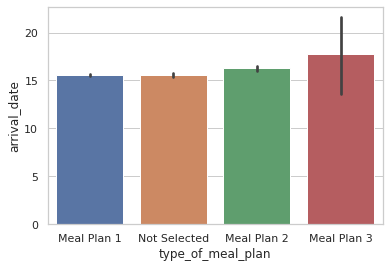

In [ ]:
#the graph shows that customers that booked for reservation,preffered to eat Meal plan 1,followed by Meal plan 2, while
#Meal plan 3 has the lowest
from numpy import mean
ax =sns.barplot(x='type_of_meal_plan', y='arrival_date',data=Emma, estimator=mean)

In [ ]:
Emma.groupby('type_of_meal_plan').count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
type_of_meal_plan,,,,,,,,,,,,,,,,,,
Meal Plan 1,27835,27835,27835,27835,27835,27835,27835,27835,27835,27835,27835,27835,27835,27835,27835,27835,27835,27835
Meal Plan 2,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305
Meal Plan 3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Not Selected,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130


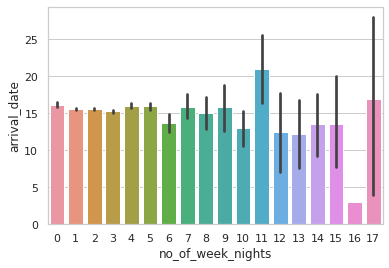

In [ ]:
# from the graph below shows that customers booked most in week 2,followed by week 1,week 3, week 4,
#week 0, week 5 and week 6
# while week 16 has the lowest inflow of customers,followed by week 17 and so on.
from numpy import mean
ax =sns.barplot(x='no_of_week_nights', y='arrival_date',data=Emma, estimator=mean)


In [ ]:
Emma.groupby('no_of_week_nights').count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_week_nights,,,,,,,,,,,,,,,,,,
0,2387,2387,2387,2387,2387,2387,2387,2387,2387,2387,2387,2387,2387,2387,2387,2387,2387,2387
1,9488,9488,9488,9488,9488,9488,9488,9488,9488,9488,9488,9488,9488,9488,9488,9488,9488,9488
2,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444
3,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839
4,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990
5,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614
6,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189
7,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
8,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62


In [ ]:
Emma.groupby(['arrival_year', 'arrival_month', 'booking_status'])['type_of_meal_plan'].value_counts().sort_values(ascending = False).head(20)


arrival_year  arrival_month  booking_status  type_of_meal_plan
2018          6              Not_Canceled    Meal Plan 1          1558
              10             Not_Canceled    Meal Plan 1          1463
2017          10             Not_Canceled    Meal Plan 1          1387
2018          4              Not_Canceled    Meal Plan 1          1368
              5              Not_Canceled    Meal Plan 1          1322
              3              Not_Canceled    Meal Plan 1          1320
              12             Not_Canceled    Meal Plan 1          1290
              9              Not_Canceled    Meal Plan 1          1204
              10             Canceled        Meal Plan 1          1156
              7              Not_Canceled    Meal Plan 1          1155
              8              Not_Canceled    Meal Plan 1          1144
              11             Not_Canceled    Meal Plan 1          1126
              2              Not_Canceled    Meal Plan 1          1074
2017          

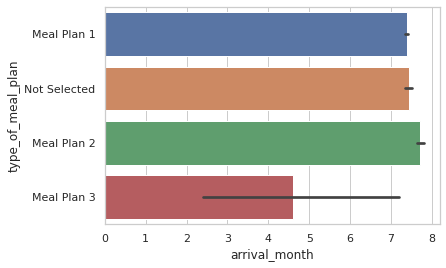

In [ ]:
from numpy import mean
ax =sns.barplot(x= 'arrival_month',y='type_of_meal_plan',data=Emma, estimator=mean)

arrival_year  market_segment_type
2017          Online                  2951
              Offline                 2926
              Corporate                498
              Complementary            139
2018          Online                 20263
              Offline                 7602
              Corporate               1519
              Complementary            252
              Aviation                 125
Name: market_segment_type, dtype: int64 



It is clearly see that, in 2018, the market_segment_type of ONLINE is quite popular.




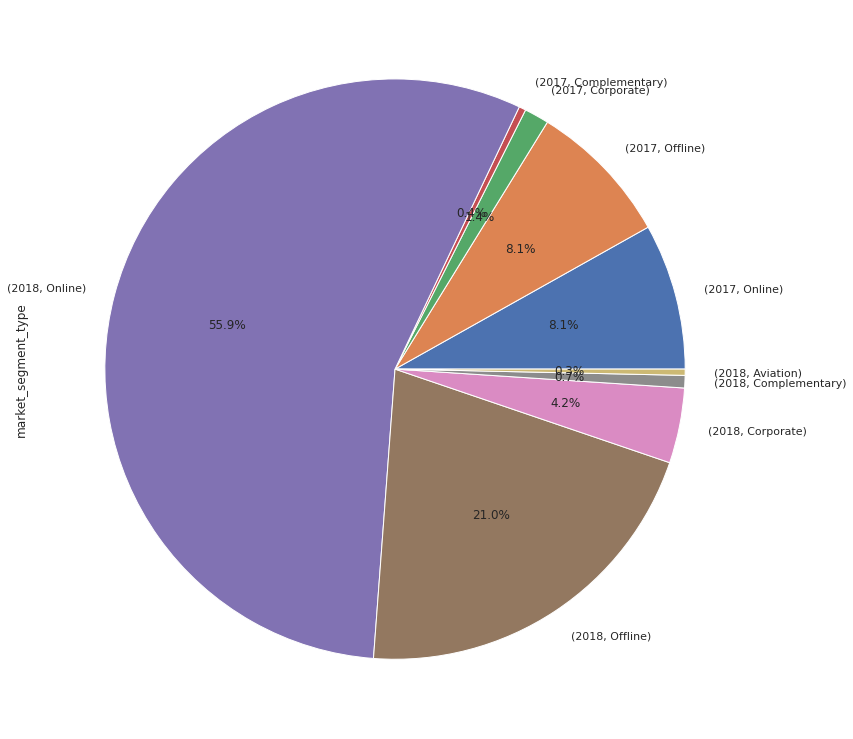

In [ ]:
#####  the table shows that 2018 has the highest numbers of online
print(Emma.groupby(['arrival_year'])['market_segment_type'].value_counts(ascending = False),'\n\n\n')
print('It is clearly see that, in 2018, the market_segment_type of ONLINE is quite popular.\n\n')
plt.figure(figsize = (13, 25))
Emma.groupby(['arrival_year'])['market_segment_type'].value_counts(ascending = False).plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

The countplot of the repeated_guest is given below.




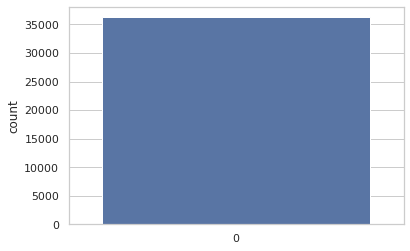

In [ ]:
##### Show how many repeated_guest ####
print('The countplot of the repeated_guest is given below.\n\n')
sns.countplot(Emma.loc[:, 'repeated_guest'])
plt.show()

In [ ]:
#Shw the correlation of this dataset
Emma.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


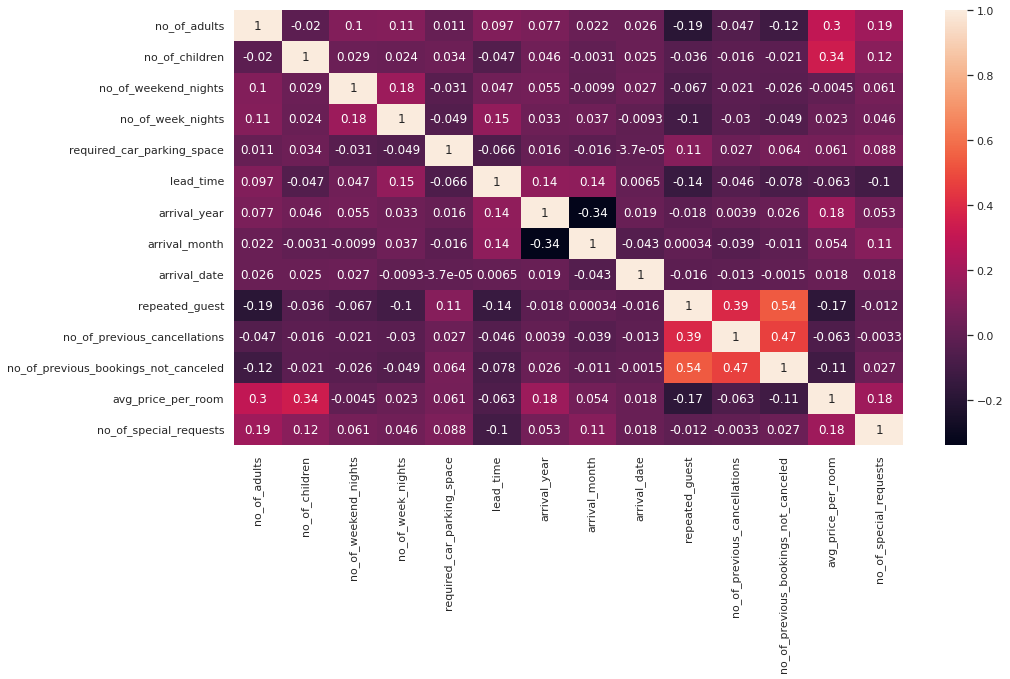

In [ ]:
##### Show this correlation in a heatmap #####
plt.figure(figsize = (15, 8))
sns.heatmap(Emma.corr(), annot = True)
plt.show()

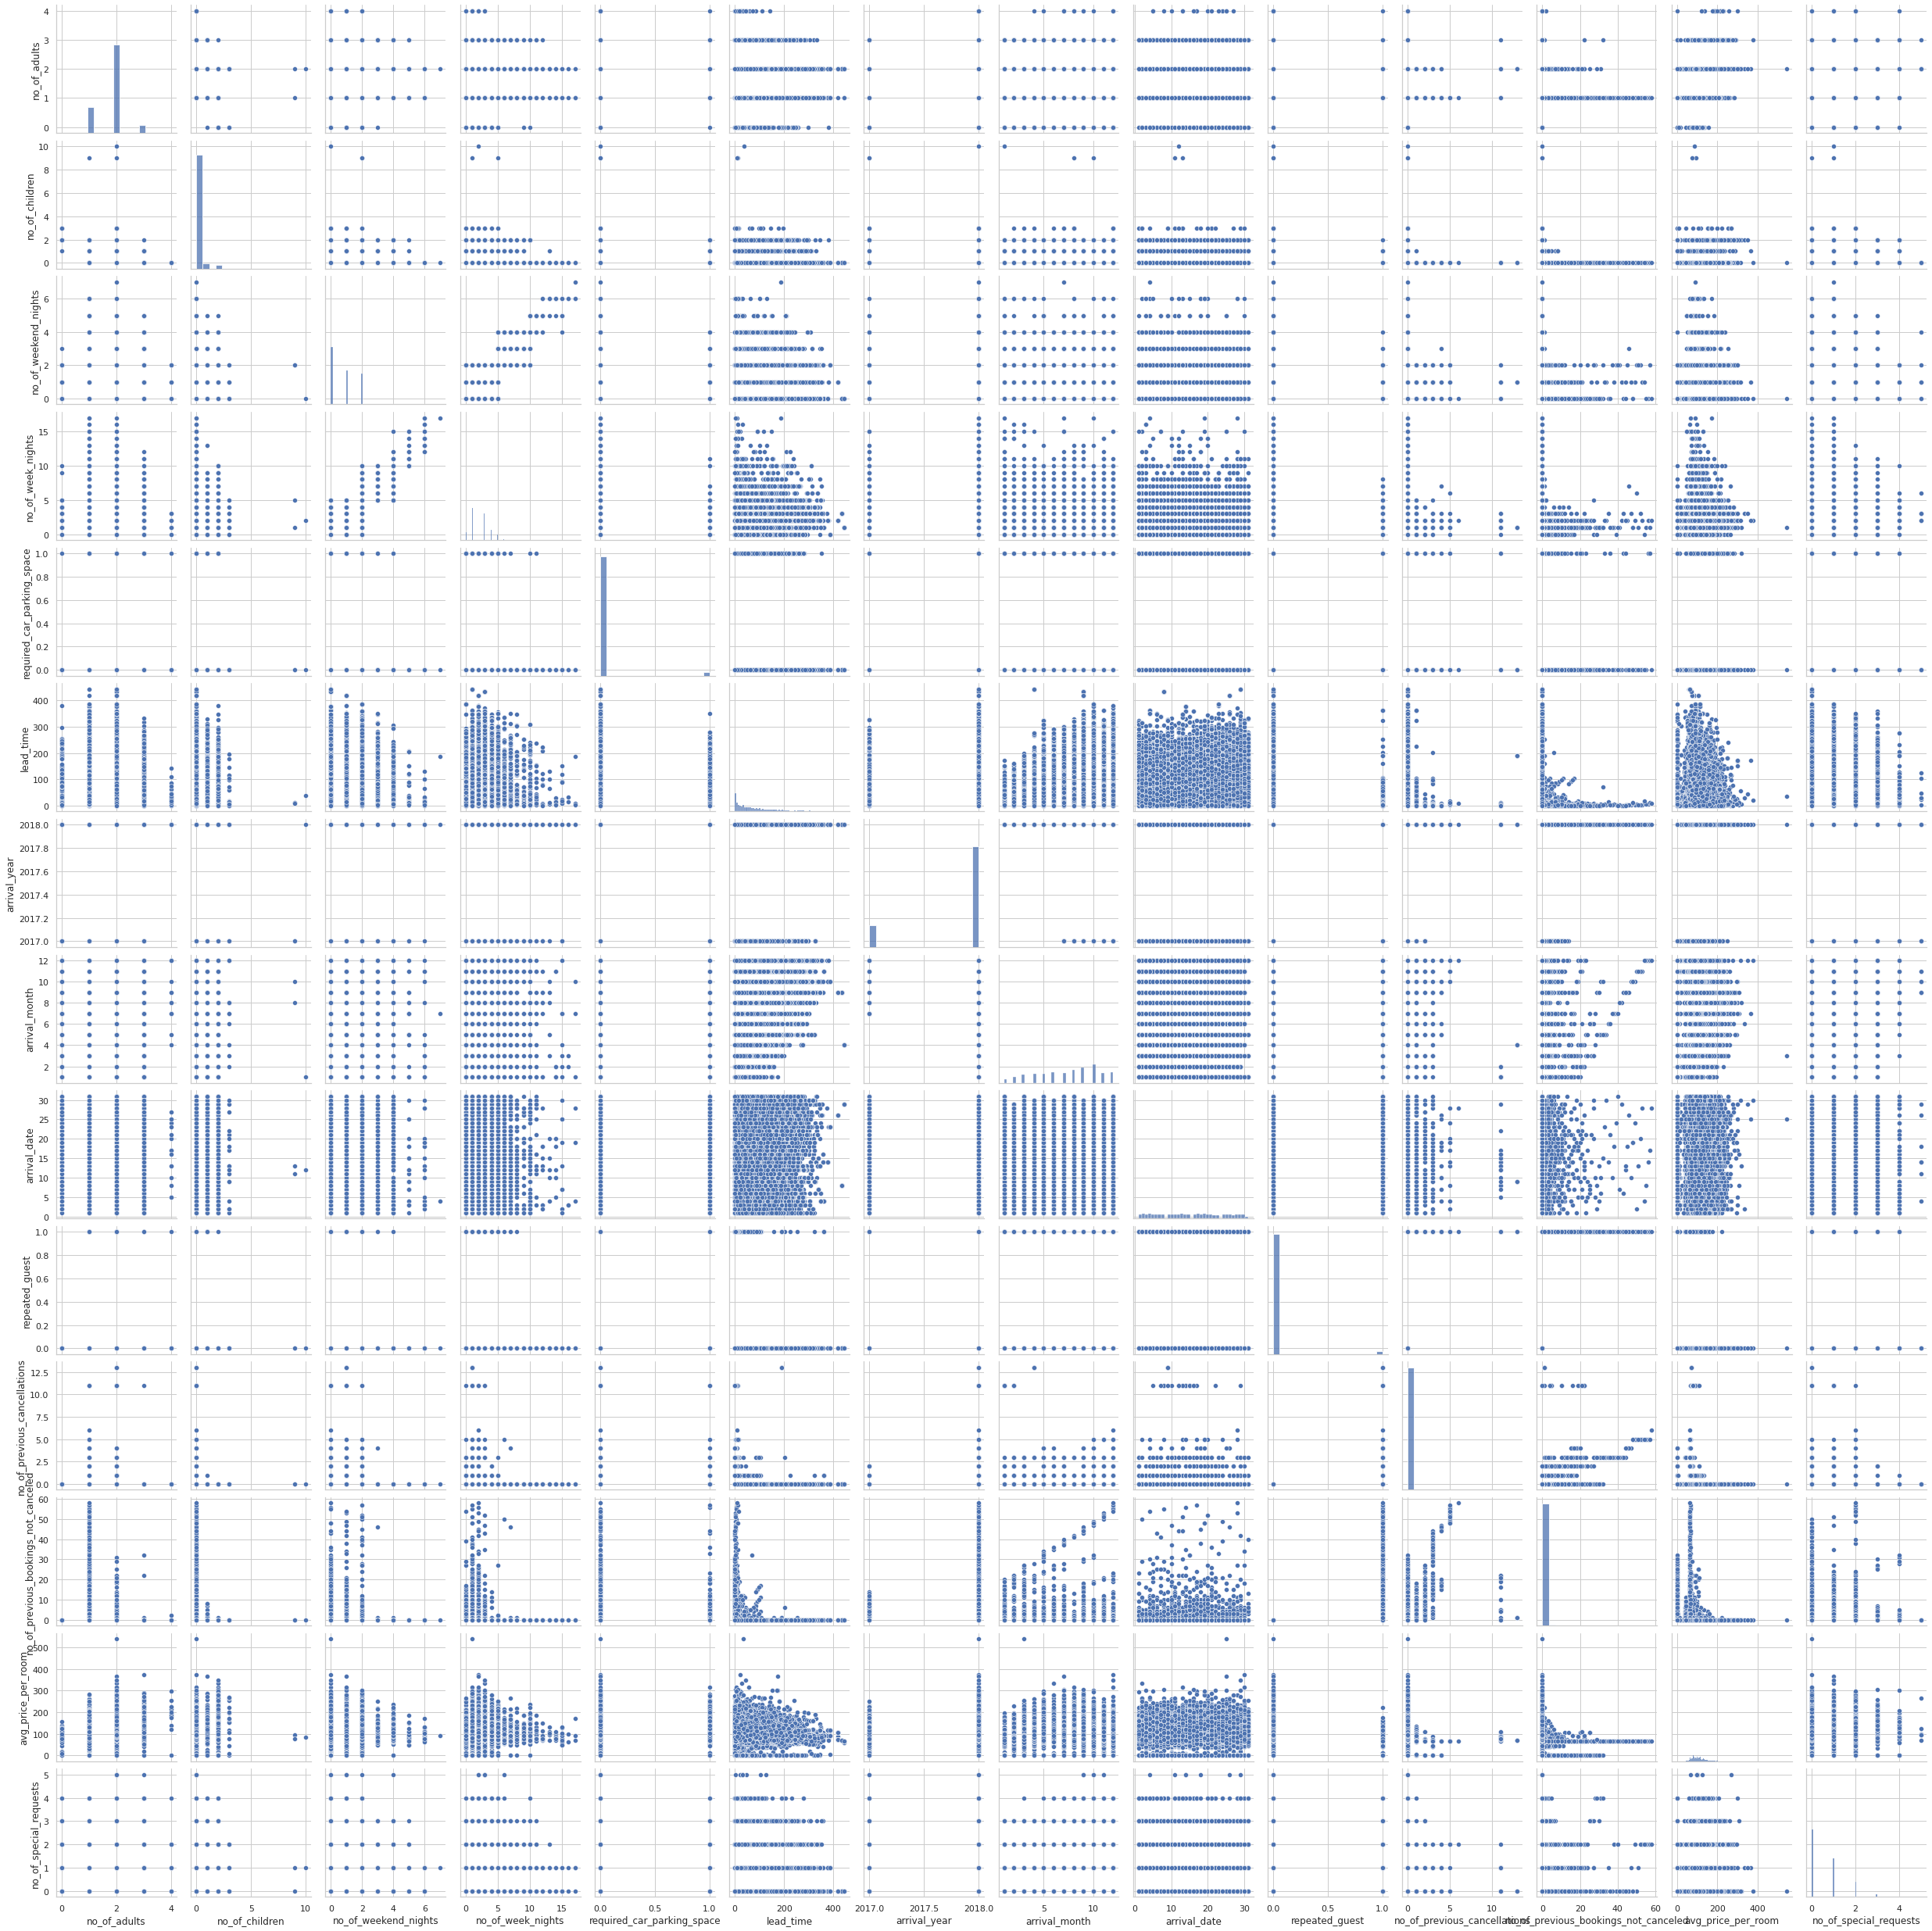

In [ ]:
##### the diagram below Show the pairplot of this entire dataset
sns.pairplot(Emma)
plt.show()

In [ ]:
#to check if there are duplicaticate records
if Emma.duplicated().sum().sum() == 0:
  print('There is no DUPLICATED records in this dataset.')
else:
  print('There is DUPLICATED records in this dataset.')

There is no DUPLICATED records in this dataset.


In [ ]:
#This command is used to drop the column booking_id
def drop_columns(column_list_):
  Emma.drop(column_list_, axis = 1, inplace = True)

drop_columns('Booking_ID')

print('Column is deleted.')

Column is deleted.


In [ ]:
##### Handle booking_status using Label Encoder : 1 - Not_Canceled
# to convert the string to integer, that is one(1) will be assign to not canceled and 0  will be canceled
Emma.loc[:, 'booking_status'] = Emma.loc[:, 'booking_status'].map({'Not_Canceled': 1, 'Canceled': 0})

Emma.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


In [ ]:
## Do One Hot Encoding type_of_meal_plan, room_type_reserved, market_segment_type
## to convert the dataset in them to binary since the computer in machine learning only recognized binary
one_hot_Emma = pd.get_dummies(data = Emma, drop_first = True)

one_hot_Emma.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
##### Show the records of this new dataset and the old one
print('The old records of that dataset is {}'.format(Emma.shape[0]),'\n')
print('The old columns of that dataset is {}'.format(Emma.shape[1]),'\n')
print('*'*120)
print('The new records of this dataset is {}'.format(one_hot_Emma.shape[0]),'\n')
print('The new columns of this dataset is {}'.format(one_hot_Emma.shape[1]),'\n')

The old records of that dataset is 36275 

The old columns of that dataset is 18 

************************************************************************************************************************
The new records of this dataset is 36275 

The new columns of this dataset is 28 



In [ ]:
##### Drop the target column from this dataset which is booking_status( canceled and not_canceled)
y = one_hot_Emma.loc[:, 'booking_status']
one_hot_Emma.drop(['booking_status'], axis = 1, inplace = True)

X = one_hot_Emma.loc[:, :]

print('The shape of X is {}'.format(X.shape,'\n'))
print('The shape of y is {}'.format(y.shape))

The shape of X is (36275, 27)
The shape of y is (36275,)


In [ ]:
from collections import Counter
from functools import reduce
from itertools import chain
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR

In [ ]:
##### Preprocessing the dataset , you need to scale the dataset
StandardScaler_ = StandardScaler()
X_scaled = StandardScaler_.fit_transform(X)

print(X_scaled)

[[ 0.29889263 -0.26147045  0.2174012  ... -0.24264534  1.56383302
  -1.33317382]
 [ 0.29889263 -0.26147045  1.36599262 ... -0.24264534 -0.63945446
   0.75008974]
 [-1.62897546 -0.26147045  1.36599262 ... -0.24264534 -0.63945446
   0.75008974]
 ...
 [ 0.29889263 -0.26147045  1.36599262 ... -0.24264534 -0.63945446
   0.75008974]
 [ 0.29889263 -0.26147045 -0.93119021 ... -0.24264534 -0.63945446
   0.75008974]
 [ 0.29889263 -0.26147045  0.2174012  ... -0.24264534  1.56383302
  -1.33317382]]


In [ ]:
##### Split the dataset into train and test #####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle = True)

print('The X_train shape is {}'.format(X_train.shape),'\n')
print('The X_test  shape is {}'.format(X_test.shape),'\n')
print('The y_train shape is {}'.format(y_train.shape),'\n')
print('The y_test  shape is {}'.format(y_test.shape),'\n')

The X_train shape is (29020, 27) 

The X_test  shape is (7255, 27) 

The y_train shape is (29020,) 

The y_test  shape is (7255,) 



In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

In [ ]:
##### Listed all the models to used are listed
### because are a non-parametric supervised learning method used for classification and regression.
## The goal is to create a model that predicts the value of a target variable by learning
models_list_ = {'GNB': GaussianNB(), 'BNB': BernoulliNB(), 'MNB': MultinomialNB(),\
                'SGD': SGDClassifier(), 'Perception': Perceptron(),\
                'MLP': MLPClassifier(), 'LR': LogisticRegression(),\
                'DT': DecisionTreeClassifier(),'RF': RandomForestClassifier(),\
                'Adaboost': AdaBoostClassifier(), 'GBoost': GradientBoostingClassifier(),\
                'XGB': XGBClassifier()}

##### Run all the models and find the performance by evaluating the metrices #####
performance_list_    = []

for classifier_name, model in models_list_.items():

  dataframe_dictonary_ = {}
  print('{} classifier is running for Okohe Emmanuel Odigie.\n\n'.format(classifier_name).upper())

  ##### Fit the model using that model's object #####
  model.fit(X_train, y_train)

  ##### Predict the model #####
  predicted_ = model.predict(X_test)

  ##### Show the performance using metrics #####
  print('Accuracy score of {} is  = {}'.format(classifier_name, accuracy_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['accuracy_score'.upper()] = accuracy_score(predicted_, y_test)

  print('Precision score of {} is = {}'.format(classifier_name, precision_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['precision_score'.upper()] = precision_score(predicted_, y_test)

  print('Recall score of {} is    = {}'.format(classifier_name, recall_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['recall_score'.upper()] = recall_score(predicted_, y_test)

  print('F1_Score of {} is        = {}'.format(classifier_name, f1_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['f1_score'.upper()] = f1_score(predicted_, y_test)

  print('*'*100)

##### Append this into performance list #####
  performance_list_.append(pd.DataFrame(dataframe_dictonary_, index = [classifier_name.upper()]))

GNB CLASSIFIER IS RUNNING FOR OKOHE EMMANUEL ODIGIE.


Accuracy score of gnb is  = 0.4136457615437629 

Precision score of gnb is = 0.13763174209547427 

Recall score of gnb is    = 0.891566265060241 

F1_score of gnb is        = 0.238453276047261 

****************************************************************************************************
BNB CLASSIFIER IS RUNNING FOR OKOHE EMMANUEL ODIGIE.


Accuracy score of bnb is  = 0.7335630599586492 

Precision score of bnb is = 0.8625749121719364 

Recall score of bnb is    = 0.766997427416391 

F1_score of bnb is        = 0.8119832701099116 

****************************************************************************************************
MNB CLASSIFIER IS RUNNING FOR OKOHE EMMANUEL ODIGIE.


Accuracy score of mnb is  = 0.7279117849758787 

Precision score of mnb is = 0.7863194874974169 

Recall score of mnb is    = 0.8018967334035827 

F1_score of mnb is        = 0.7940317195325542 

***********************************************

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of lr is  = 0.8020675396278428 

Precision score of lr is = 0.898326100433974 

Recall score of lr is    = 0.8215838215838216 

F1_score of lr is        = 0.8582428430404738 

****************************************************************************************************
DT CLASSIFIER IS RUNNING FOR OKOHE EMMANUEL ODIGIE.


Accuracy score of dt is  = 0.8708476912474156 

Precision score of dt is = 0.898326100433974 

Recall score of dt is    = 0.9071368948247078 

F1_score of dt is        = 0.9027099989616862 

****************************************************************************************************
RF CLASSIFIER IS RUNNING FOR OKOHE EMMANUEL ODIGIE.


Accuracy score of rf is  = 0.9046175051688491 

Precision score of rf is = 0.9468898532754702 

Recall score of rf is    = 0.9132947976878613 

F1_score of rf is        = 0.9297889610389609 

****************************************************************************************************
ADABOOST CLASSI

In [ ]:
# using k10 fold to cross-validation and prediction
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
StratifiedKFold_ = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

count_, history_, accuracy_score_, precision_score_, recall_score_, f1_score_ = 1, [], [], [], [], []

for train_index_, test_index_, in StratifiedKFold_.split(X_scaled, y):
  print('Cross validation {} is running for Okohe Emmanuel Odigie.\n'.format(count_).upper())

  X_train, X_test = X_scaled[train_index_], X_scaled[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  RF = RandomForestClassifier()
  RF.fit(X_train, y_train)

  predicted_ = RF.predict(X_test)

  print('Accuracy score is  = {}'.format(accuracy_score(predicted_, y_test)).capitalize(),'\n')
  accuracy_score_.append(accuracy_score(predicted_, y_test))

  print('Precision score is = {}'.format(precision_score(predicted_, y_test)).capitalize(),'\n')
  precision_score_.append(precision_score(predicted_, y_test))

  print('Recall score is    = {}'.format(recall_score(predicted_, y_test)).capitalize(),'\n')
  recall_score_.append(recall_score(predicted_, y_test))

  print('F1_Score is        = {}'.format(f1_score(predicted_, y_test)).capitalize(),'\n')
  f1_score_.append(f1_score(predicted_, y_test))

  print('The confusion matrix is given below.\n')
  print(confusion_matrix(predicted_, y_test),'\n')

  count_ = count_ + 1

CROSS VALIDATION 1 IS RUNNING FOR OKOHE EMMANUEL ODIGIE.

Accuracy score is  = 0.9027012127894156 

Precision score is = 0.9425994259942599 

Recall score is    = 0.9152070063694268 

F1_score is        = 0.9287012724702081 

The confusion matrix is given below.

[[ 976  140]
 [ 213 2299]] 

CROSS VALIDATION 2 IS RUNNING FOR OKOHE EMMANUEL ODIGIE.

Accuracy score is  = 0.9010474090407938 

Precision score is = 0.950389503895039 

Recall score is    = 0.906885758998435 

F1_score is        = 0.9281281281281281 

The confusion matrix is given below.

[[ 951  121]
 [ 238 2318]] 

CROSS VALIDATION 3 IS RUNNING FOR OKOHE EMMANUEL ODIGIE.

Accuracy score is  = 0.9090407938257994 

Precision score is = 0.949979499794998 

Recall score is    = 0.9176237623762377 

F1_score is        = 0.9335213537469782 

The confusion matrix is given below.

[[ 981  122]
 [ 208 2317]] 

CROSS VALIDATION 4 IS RUNNING FOR OKOHE EMMANUEL ODIGIE.

Accuracy score is  = 0.9156560088202866 

Precision score is = 0.9

In [ ]:
## Show the performance of KFold - 10  and there mean
print('The list of accuracy score run by Okohe Emmanuel Odigie is  {}'.format(accuracy_score_),'\n')
print('The list of precision score run by Okohe Emmanuel Odigie is {}'.format(precision_score_),'\n')
print('The list of recall score run by Okohe Emmanuel Odigie is    {}'.format(recall_score_),'\n')
print('The list of f1_score score run by Okohe Emmanuel Odigie is  {}'.format(f1_score_),'\n')

print('*'*100)

print('The accuracy score run by Okohe Emmanuel Odigie is  # {}'.format(np.array(accuracy_score_).mean()),'\n')
print('The precision score run by Okohe Emmanuel Odigie is # {}'.format(np.array(precision_score_).mean()),'\n')
print('The recall score is run by Okohe Emmanuel Odigie   # {}'.format(np.array(recall_score_).mean()),'\n')
print('The f1_score score is run by Okohe Emmanuel Odigie  # {}'.format(np.array(f1_score_).mean()),'\n')

The list of accuracy score run by Okohe Emmanuel Odigie is  [0.9027012127894156, 0.9010474090407938, 0.9090407938257994, 0.9156560088202866, 0.9021499448732084, 0.902398676592225, 0.9004687069203198, 0.9035015164047422, 0.910394265232975, 0.9054314860766474] 

The list of precision score run by Okohe Emmanuel Odigie is [0.9425994259942599, 0.950389503895039, 0.949979499794998, 0.947519475194752, 0.9536695366953669, 0.949569495694957, 0.9339893398933989, 0.9446494464944649, 0.9540795407954079, 0.948749487494875] 

The list of recall score run by Okohe Emmanuel Odigie is    [0.9152070063694268, 0.906885758998435, 0.9176237623762377, 0.9284853354760948, 0.9057632398753894, 0.9093050647820966, 0.9192897497982244, 0.9146486701071854, 0.9161417322834645, 0.9139020537124802] 

The list of f1_score score run by Okohe Emmanuel Odigie is  [0.9287012724702081, 0.9281281281281281, 0.9335213537469782, 0.9379058441558441, 0.9290992610345515, 0.9290012033694344, 0.9265812487288997, 0.9294070189592577

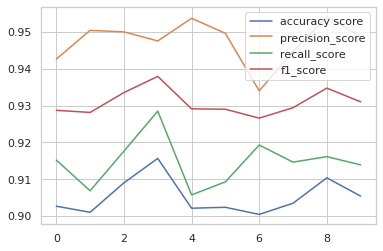

In [ ]:
##### Plot the evalution matrix of the various classifiers algorithm used
plt.plot(accuracy_score_, label = 'accuracy score')
plt.plot(precision_score_, label = 'precision_score')
plt.plot(recall_score_, label = 'recall_score')
plt.plot(f1_score_, label = 'f1_score')
plt.legend()
plt.show()